In [1]:
DATA = '/Users/youngeun/prac_stat/data'

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 🫁 폐 기능 지표 데이터

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lung = pd.read_csv(LUNG_CSV)
lung.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [6]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_: .3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept:  424.583
Coefficient Exposure: -4.185


In [7]:
fitted = model.predict(lung[predictors])
fitted

array([424.58280657, 424.58280657, 424.58280657, 424.58280657,
       420.39823009, 416.2136536 , 416.2136536 , 416.2136536 ,
       412.02907712, 412.02907712, 412.02907712, 412.02907712,
       412.02907712, 412.02907712, 407.84450063, 407.84450063,
       407.84450063, 407.84450063, 407.84450063, 407.84450063,
       403.65992415, 399.47534766, 399.47534766, 399.47534766,
       399.47534766, 399.47534766, 395.29077118, 395.29077118,
       395.29077118, 395.29077118, 395.29077118, 395.29077118,
       395.29077118, 391.10619469, 386.9216182 , 382.73704172,
       382.73704172, 382.73704172, 374.36788875, 374.36788875,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       365.99873578, 365.99873578, 365.99873578, 365.99873578,
       365.99873578, 365.99873578, 361.81415929, 361.81415929,
       361.81415929, 357.62958281, 357.62958281, 353.44500632,
       353.44500632, 353.44500632, 353.44500632, 353.44

In [8]:
# lung[outcome] = lung['PEFR']
residu = lung[outcome] - fitted
residu

0      -34.582807
1      -14.582807
2        5.417193
3       35.417193
4       -0.398230
          ...    
117    117.477876
118    157.477876
119    167.477876
120     41.662453
121     61.662453
Name: PEFR, Length: 122, dtype: float64

In [9]:
from matplotlib import pyplot as plt

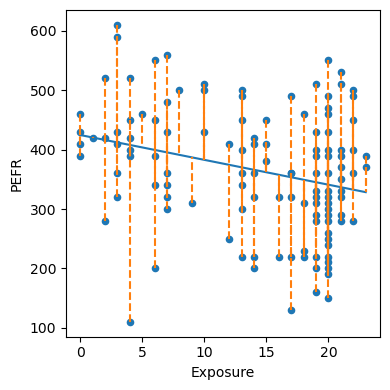

In [10]:
# visualizing residus
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4)) # datapoints
ax.plot(lung.Exposure, fitted) # fitted line 
# residu: 동일한 x 위치에서 실제 값(yactual)과 예측 값(yfitted)을 연결하는 세로 점선
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1') # 시작점: (x, yactual) -> 끝점: (x, yfitted)

plt.tight_layout()
plt.show()

In [2]:
LUNG_CSV = DATA  +  '/LungDisease.csv'
#HOUSE_CSV = DATA + '/house_sales.csv'

### 🏠 주택 가치 데이터 

In [3]:
HOUSE_CSV = DATA + '/house_sales.csv'

In [4]:
house = pd.read_csv(HOUSE_CSV, sep='\t')

In [5]:
outcome = 'AdjSalePrice'

###### sneak peak

In [10]:
house.dtypes

DocumentDate        object
SalePrice            int64
PropertyID           int64
PropertyType        object
ym                  object
zhvi_px              int64
zhvi_idx           float64
AdjSalePrice       float64
NbrLivingUnits       int64
SqFtLot              int64
SqFtTotLiving        int64
SqFtFinBasement      int64
Bathrooms          float64
Bedrooms             int64
BldgGrade            int64
YrBuilt              int64
YrRenovated          int64
TrafficNoise         int64
LandVal              int64
ImpsVal              int64
ZipCode              int64
NewConstruction       bool
dtype: object

In [12]:
house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [11]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade'] # 정수/실수형 칼럼 only 
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


###### done

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [14]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f'  {name}: {coef}')

Intercept: -521871.368
Coefficients:
  SqFtTotLiving: 228.83060360240498
  SqFtLot: -0.06046682065305298
  Bathrooms: -19442.8403983214
  Bedrooms: -47769.955185213956
  BldgGrade: 106106.96307898125


In [30]:
fitted = house_lm.predict(house[predictors])
fitted, len(fitted)

(array([ 424555.81419413, 1135307.41308934,  571696.27428408, ...,
         148421.08061431,  346082.70383261,  228913.37004649]),
 22687)

In [31]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))

In [32]:
RMSE

261220.19743696266

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(house[outcome], fitted)
r2

0.5405875253381902

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [35]:
model = sm.OLS(house[outcome], house[predictors].assign(const=1))

In [36]:
house[predictors].assign(const=1)

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,const
1,2400,9373,3.00,6,7,1
2,3764,20156,3.75,4,10,1
3,2060,26036,1.75,4,8,1
4,3200,8618,3.75,5,7,1
5,1720,8620,1.75,4,7,1
...,...,...,...,...,...,...
27057,1480,5468,1.75,3,7,1
27058,4720,23914,4.50,4,11,1
27061,1070,11170,1.00,4,6,1
27062,1345,6223,2.00,3,7,1


In [37]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:41:56   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
temp = house.columns
temp

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [39]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType', 
             'NbrLivingUnits', 'SqFtFinBasement',  'YrBuilt', 'YrRenovated', 'NewConstruction']

In [40]:
len(predictors)

11

In [41]:
X = pd.get_dummies(house[predictors], drop_first=True)

In [42]:
len(X.columns)

12

In [43]:
X.head()

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,NbrLivingUnits,SqFtFinBasement,YrBuilt,YrRenovated,NewConstruction,PropertyType_Single Family,PropertyType_Townhouse
1,2400,9373,3.00,6,7,2,0,1991,0,False,0,0
2,3764,20156,3.75,4,10,1,1452,2005,0,True,1,0
3,2060,26036,1.75,4,8,1,900,1947,0,False,1,0
4,3200,8618,3.75,5,7,1,1640,1966,0,False,1,0
5,1720,8620,1.75,4,7,1,0,1948,0,False,1,0


In [44]:
X.columns

Index(['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade',
       'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt', 'YrRenovated',
       'NewConstruction', 'PropertyType_Single Family',
       'PropertyType_Townhouse'],
      dtype='object')

In [45]:
house.PropertyType.unique()

array(['Multiplex', 'Single Family', 'Townhouse'], dtype=object)

In [46]:
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]                        

In [47]:
X.assign(const=1) 

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,NbrLivingUnits,SqFtFinBasement,YrBuilt,YrRenovated,NewConstruction,PropertyType_Single Family,PropertyType_Townhouse,const
1,2400,9373,3.00,6,7,2,0,1991,0,0,0,0,1
2,3764,20156,3.75,4,10,1,1452,2005,0,1,1,0,1
3,2060,26036,1.75,4,8,1,900,1947,0,0,1,0,1
4,3200,8618,3.75,5,7,1,1640,1966,0,0,1,0,1
5,1720,8620,1.75,4,7,1,0,1948,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,1480,5468,1.75,3,7,1,590,1951,0,0,1,0,1
27058,4720,23914,4.50,4,11,1,910,2000,0,0,1,0,1
27061,1070,11170,1.00,4,6,1,0,1971,0,0,1,0,1
27062,1345,6223,2.00,3,7,1,0,1939,0,0,1,0,1


In [48]:
outcome = 'AdjSalePrice'
house_full = sm.OLS(house[outcome], X.assign(const=1))

In [49]:
results = house_full.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:42:04   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                198.6364      4.234     46.920      0.000     190.338     206.934
SqFtLot                        0.0771      0.058      1.330      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.114     11.255      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.187e+04   2396.904    -21.638      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2441.242     56.228      0.000    1.32e+05    1.42e+05
NbrLivingUnits              5723.8438   1.76e+04      0.326      0.744   -2.87e+04    4.01e+04
SqFtFinBasement                7.0611      4.627      1.526      0.127      -2.009      16.131
YrBuilt                    -3574.2210     77.228    -46.282      0.000   -3725.593   -3422.849
YrRenovated                   -2.5311      3.924     -0.645      0.519     -10.222       5.160
NewConstruction            -2489.1122   5936.692     -0.419      0.675   -1.41e+04    9147.211
PropertyType_Single Family  2.997e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.286e+04    2.7e+04      3.438      0.001    3.99e+04    1.46e+05
const                       6.182e+06   1.55e+05     39.902      0.000    5.88e+06    6.49e+06
==============================================================================
Omnibus:                    31006.128   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26251977.078
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.984   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 단계적 회귀

In [50]:
# step AIC
from dmba import stepwise_selection
from dmba import AIC_score

In [51]:
y = house[outcome]

In [52]:
# 주어진 변수 집합(column들)을 가지고 train한 모델 return 
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

In [53]:
# 주어진 모델델과 변수 세트에 대한 점수 반환 
from sklearn.linear_model import LinearRegression
'''
AIC score(y_true: Vector, y_pred: Vector, model: Optional[Any] = None, df: Optional[int] = None) 
df: degree of freedom
'''
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

In [54]:
best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, verbose=True)

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None


In [56]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients: ')
for name, coef in zip(best_variables, best_model.coef_):
    print(f'  {name}: {coef}')

Intercept: 6178645.017
Coefficients: 
  SqFtTotLiving: 199.27755304202714
  BldgGrade: 137159.56022619037
  YrBuilt: -3565.424939249412
  Bedrooms: -51947.38367361332
  Bathrooms: 42396.164527719826
  PropertyType_Townhouse: 84479.16203300658
  SqFtFinBasement: 7.046974967578159
  PropertyType_Single Family: 22912.055187018843


#### 가중회귀

In [8]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Weight'] = house.Year - 2005

In [9]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']

In [10]:
outcome = 'AdjSalePrice'

In [13]:
house_wt = LinearRegression()

In [15]:
# 가중치 파라미터: sample_weight
house_wt.fit(house[predictors], house[outcome], sample_weight = house.Weight)

LinearRegression()

#### 가변수 표현

In [5]:
house.PropertyType.head()

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
Name: PropertyType, dtype: object

In [6]:
pd.get_dummies(house['PropertyType']).head()

,Multiplex,Single Family,Townhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [7]:
# 다중공선성 문제를 피하려면 이것을 사용 
pd.get_dummies(house['PropertyType'], drop_first=True).head()

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


In [8]:
pd.DataFrame(house['ZipCode'].value_counts()).transpose()

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98068,98113,98043
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


In [24]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType']
X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f' {name}: {coef}')           

Intercept: -446841.366
Coefficients:
 SqFtTotLiving: 223.37362892503558
 SqFtLot: -0.0703679813681255
 Bathrooms: -15979.01347341559
 Bedrooms: -50889.7321848297
 BldgGrade: 109416.30516146209
 PropertyType_Single Family: -84678.21629549163
 PropertyType_Townhouse: -115121.9792160905


#### 요인변수가 많은 경우 
- 잔차 중간값 기준으로 그룹화

In [8]:
outcome = 'AdjSalePrice'

###### step-by-step

In [12]:
pd.DataFrame({'ZipCode': house['ZipCode'], 
            'residual': house[outcome] - house_lm.predict(house[predictors])})

,ZipCode,residual
1,98002,-123750.814194
2,98166,-59145.413089
3,98166,190108.725716
4,98168,-198788.774412
5,98168,-91774.996129
...,...,...
27057,98126,61921.802132
27058,98040,140828.931399
27061,98055,72322.919386
27062,98166,-3875.703833


In [13]:
temp = pd.DataFrame({'ZipCode': house['ZipCode'], 'residual': house[outcome] - house_lm.predict(house[predictors])})
temp = temp.groupby(['ZipCode']).apply(lambda x: {'ZipCode':x.iloc[0, 0], 'count':len(x), 'median_residual': x.residual.median()})
temp

ZipCode
98001    {'ZipCode': 98001, 'count': 358, 'median_resid...
98002    {'ZipCode': 98002, 'count': 180, 'median_resid...
98003    {'ZipCode': 98003, 'count': 241, 'median_resid...
98004    {'ZipCode': 98004, 'count': 293, 'median_resid...
98005    {'ZipCode': 98005, 'count': 133, 'median_resid...
                               ...                        
98198    {'ZipCode': 98198, 'count': 225, 'median_resid...
98199    {'ZipCode': 98199, 'count': 393, 'median_resid...
98224    {'ZipCode': 98224, 'count': 3, 'median_residua...
98288    {'ZipCode': 98288, 'count': 4, 'median_residua...
98354    {'ZipCode': 98354, 'count': 9, 'median_residua...
Length: 80, dtype: object

In [14]:
type(temp)

pandas.core.series.Series

In [15]:
temp.index

Int64Index([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
            98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
            98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
            98043, 98045, 98047, 98050, 98051, 98052, 98053, 98055, 98056,
            98057, 98058, 98059, 98065, 98068, 98070, 98072, 98074, 98075,
            98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
            98112, 98113, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
            98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168,
            98177, 98178, 98188, 98198, 98199, 98224, 98288, 98354],
           dtype='int64', name='ZipCode')

In [16]:
temp.values

array([{'ZipCode': 98001, 'count': 358, 'median_residual': -125549.1294836502},
       {'ZipCode': 98002, 'count': 180, 'median_residual': -60076.24485961301},
       {'ZipCode': 98003, 'count': 241, 'median_residual': -131528.87532448443},
       {'ZipCode': 98004, 'count': 293, 'median_residual': 383596.0287286616},
       {'ZipCode': 98005, 'count': 133, 'median_residual': 69759.77408085472},
       {'ZipCode': 98006, 'count': 460, 'median_residual': -10075.810122475377},
       {'ZipCode': 98007, 'count': 112, 'median_residual': 43910.835111727065},
       {'ZipCode': 98008, 'count': 291, 'median_residual': 56438.773876284366},
       {'ZipCode': 98010, 'count': 56, 'median_residual': -61436.659779475944},
       {'ZipCode': 98011, 'count': 163, 'median_residual': -60646.16754370718},
       {'ZipCode': 98014, 'count': 85, 'median_residual': -46912.602105353144},
       {'ZipCode': 98019, 'count': 242, 'median_residual': -73886.90448133112},
       {'ZipCode': 98022, 'count': 188, 

In [17]:
temp2 = [*temp]
temp2

[{'ZipCode': 98001, 'count': 358, 'median_residual': -125549.1294836502},
 {'ZipCode': 98002, 'count': 180, 'median_residual': -60076.24485961301},
 {'ZipCode': 98003, 'count': 241, 'median_residual': -131528.87532448443},
 {'ZipCode': 98004, 'count': 293, 'median_residual': 383596.0287286616},
 {'ZipCode': 98005, 'count': 133, 'median_residual': 69759.77408085472},
 {'ZipCode': 98006, 'count': 460, 'median_residual': -10075.810122475377},
 {'ZipCode': 98007, 'count': 112, 'median_residual': 43910.835111727065},
 {'ZipCode': 98008, 'count': 291, 'median_residual': 56438.773876284366},
 {'ZipCode': 98010, 'count': 56, 'median_residual': -61436.659779475944},
 {'ZipCode': 98011, 'count': 163, 'median_residual': -60646.16754370718},
 {'ZipCode': 98014, 'count': 85, 'median_residual': -46912.602105353144},
 {'ZipCode': 98019, 'count': 242, 'median_residual': -73886.90448133112},
 {'ZipCode': 98022, 'count': 188, 'median_residual': -86714.59906259587},
 {'ZipCode': 98023, 'count': 455, 'med

In [18]:
type(temp2)

list

###### done

In [8]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [8]:
zip_groups = pd.DataFrame([*pd.DataFrame(
                {'ZipCode': house['ZipCode'], 
                 'residual': house[outcome] - house_lm.predict(house[predictors]), })
                          .groupby(['ZipCode'])
                           # x: ZipCode 하나로 묶인 subdataframe 전체! 
                           ## x.iloc[0,0]: 그 sub df의 첫번째 행, 첫번째 열 = 대표 zip code 
                           ## len(x): sub df 전체 행의 개수 
                           ## x.residual.median: subdf의 residual column의 중간값 
                          .apply(lambda x: {'ZipCode':x.iloc[0, 0], 'count':len(x), 'median_residual': x.residual.median()})
                                 ]).sort_values('median_residual')

In [9]:
zip_groups

,ZipCode,count,median_residual
36,98057,4,-537321.644462
27,98043,1,-307661.343614
46,98092,289,-193569.183599
23,98038,788,-150066.477035
31,98051,32,-142352.869593
...,...,...,...
60,98119,260,174462.549290
54,98112,357,232788.487256
25,98040,244,254004.002463
3,98004,293,383596.028729


In [10]:
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['cum_count']

36        4
27        5
46      294
23     1082
31     1114
      ...  
60    21746
54    22103
25    22347
3     22640
24    22687
Name: cum_count, Length: 80, dtype: int64

In [11]:
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels = False, retbins=False)
zip_groups['ZipGroup']

36    0
27    0
46    0
23    0
31    0
     ..
60    4
54    4
25    4
3     4
24    4
Name: ZipGroup, Length: 80, dtype: int64

In [12]:
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')

In [13]:
house['ZipGroup'] = house['ZipGroup'].astype('category')

#### 상호 연관된 예측 변수 제거

In [23]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'
# 범주형 -> 실수
X = pd.get_dummies(house[predictors], drop_first=True)
reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])

LinearRegression()

#### 교란변수

In [33]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType', 
            'ZipGroup']

In [34]:
# from category to binary
X = pd.get_dummies(house[predictors], drop_first=True)

In [35]:
confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])

print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f'   {name}:  {coef}')

Intercept: -666637.469
Coefficients:
   SqFtTotLiving:  210.6126600557989
   SqFtLot:  0.4549871385465867
   Bathrooms:  5928.425640001397
   Bedrooms:  -41682.87184074441
   BldgGrade:  98541.18352726017
   PropertyType_Single Family:  19323.625287919916
   PropertyType_Townhouse:  -78198.720927623
   ZipGroup_1:  53317.17330659571
   ZipGroup_2:  116251.58883563396
   ZipGroup_3:  178360.53178793142
   ZipGroup_4:  338408.6018565165


#### 상호작용과 주효과

In [36]:
import statsmodels.formula.api as smf

In [37]:
# formula R에서 긁어오면 된다
model = smf.ols(formula = 'AdjSalePrice ~ SqFtTotLiving * ZipGroup + SqFtLot + Bathrooms + Bedrooms + BldgGrade + PropertyType', data = house)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:59:18   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -4.853e+05   2.05e+04    -23.701      0.000   -5.25e+05   -4.45e+05
ZipGroup[T.1]                 -1.113e+04   1.34e+04     -0.830      0.407   -3.74e+04    1.52e+04
ZipGroup[T.2]                  2.032e+04   1.18e+04      1.717      0.086   -2877.441    4.35e+04
ZipGroup[T.3]                   2.05e+04   1.21e+04      1.697      0.090   -3180.870    4.42e+04
ZipGroup[T.4]                 -1.499e+05   1.13e+04    -13.285      0.000   -1.72e+05   -1.28e+05
PropertyType[T.Single Family]  1.357e+04   1.39e+04      0.975      0.330   -1.37e+04    4.09e+04
PropertyType[T.Townhouse]     -5.884e+04   1.51e+04     -3.888      0.000   -8.85e+04   -2.92e+04
SqFtTotLiving                   114.7650      4.863     23.600      0.000     105.233     124.297
SqFtTotLiving:ZipGroup[T.1]      32.6043      5.712      5.708      0.000      21.409      43.799
SqFtTotLiving:ZipGroup[T.2]      41.7822      5.187      8.056      0.000      31.616      51.948
SqFtTotLiving:ZipGroup[T.3]      69.3415      5.619     12.341      0.000      58.329      80.354
SqFtTotLiving:ZipGroup[T.4]     226.6836      4.820     47.032      0.000     217.237     236.131
SqFtLot                           0.6869      0.052     13.296      0.000       0.586       0.788
Bathrooms                     -3619.4533   3202.296     -1.130      0.258   -9896.174    2657.267
Bedrooms                       -4.18e+04   2120.279    -19.715      0.000    -4.6e+04   -3.76e+04
BldgGrade                      1.047e+05   2069.472     50.592      0.000    1.01e+05    1.09e+05
==============================================================================
Omnibus:                    30927.394   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         34361794.502
Skew:                           7.279   Prob(JB):                         0.00
Kurtosis:                     193.101   Cond. No.                     5.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 특잇값

In [15]:
# 우편번호가 98105인 지역의 데이터 -> 회귀모형 
house_98105 = house.loc[house['ZipCode'] == 98105,]

In [16]:
import statsmodels.api as sm

In [17]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

In [18]:
house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))

In [19]:
result_98105 = house_outlier.fit()

In [19]:
# 표준화잔차 구하기
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal
sresiduals.idxmin(), sresiduals.min()

(24333, -4.326731804078569)

In [21]:
# 특잇값 레코드 확인
outlier  = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


#### 회귀선에 대한 레코드별 영향력 확인 

In [22]:
influence = OLSInfluence(result_98105)

In [26]:
type(influence)

statsmodels.stats.outliers_influence.OLSInfluence

Text(0, 0.5, 'studentized residuals')

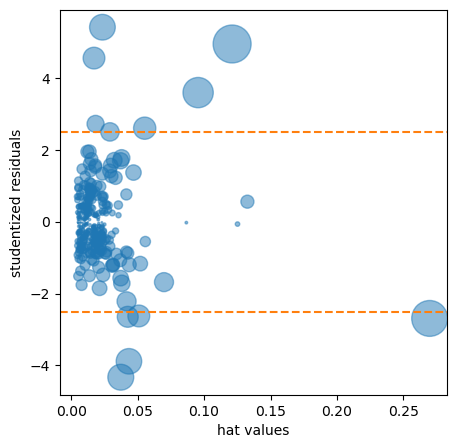

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal,
           s=1000 * np.sqrt(influence.cooks_distance[0]), alpha=0.5) # s: point size, alpha: 투명도 
ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')


#### 이분산성 확인 
- 절대잔차와 예측값의 관계 도식화
- 잔차분포 확인 

In [31]:
result_98105.fittedvalues

1036     1.282201e+06
1769     8.314002e+05
1770     7.188563e+05
1771     8.305480e+05
1783     1.445666e+06
             ...     
26628    8.013612e+05
26629    5.719200e+05
26630    7.679289e+05
26631    4.463432e+05
26632    6.421087e+05
Length: 313, dtype: float64

In [32]:
result_98105.resid

1036    -456062.232432
1769    -158145.203415
1770     -62978.327751
1771    -186794.017568
1783     -99686.534518
             ...      
26628     15171.804483
26629    -96919.956869
26630    -62899.873474
26631     -8661.168054
26632   -261156.728401
Length: 313, dtype: float64

Text(0, 0.5, 'abs(residual)')

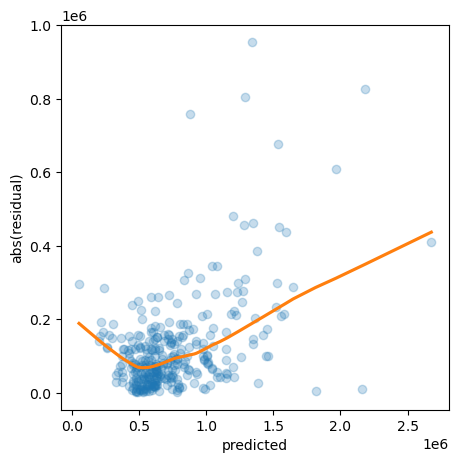

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
# x, y 파라미터 지정 안해주면 에러남. 명시적으로 뭐가 뭐의 인수로 들어가는지 다 밝혀야
sns.regplot(x=result_98105.fittedvalues, y=np.abs(result_98105.resid),
            scatter_kws={'alpha':0.25}, line_kws={'color':'C1'},
            lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

#### 편잔차그림

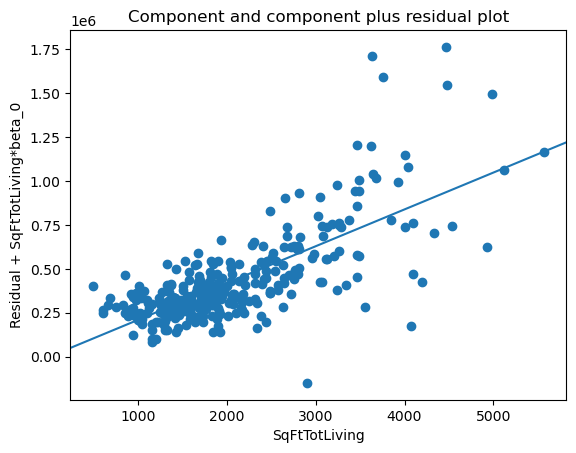

In [21]:
sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving');

## 다항회귀와 스플라인 회귀 

In [22]:
import statsmodels.formula.api as smf

In [23]:
model_poly = smf.ols(formula = 'AdjSalePrice ~ SqFtTotLiving + ' + '+ I(SqFtTotLiving**2) + ' + 
                     'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)

In [24]:
result_poly = model_poly.fit()
result_poly.summary() #절편과 다항식의 계수는 R과 다름. 구현 방식이 다르기 때문 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          9.95e-106
Time:                        15:37:04   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.159e+05   1.03e+05     -5.953      0.000   -8.19e+05   -4.12e+05
SqFtTotLiving             7.4521     55.418      0.134      0.893    -101.597     116.501
I(SqFtTotLiving ** 2)     0.0388      0.010      4.040      0.000       0.020       0.058
SqFtLot                  32.5594      5.436      5.990      0.000      21.863      43.256
Bathrooms             -1435.1231   1.95e+04     -0.074      0.941   -3.99e+04     3.7e+04
Bedrooms              -9191.9441   1.33e+04     -0.693      0.489   -3.53e+04    1.69e+04
BldgGrade              1.357e+05   1.49e+04      9.087      0.000    1.06e+05    1.65e+05
==============================================================================
Omnibus:                       75.161   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.978
Skew:                           0.699   Prob(JB):                    2.92e-139
Kurtosis:                       9.853   Cond. No.                     7.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
result_poly.params

Intercept               -615850.841791
SqFtTotLiving                 7.452134
I(SqFtTotLiving ** 2)         0.038791
SqFtLot                      32.559355
Bathrooms                 -1435.123106
Bedrooms                  -9191.944128
BldgGrade                135717.060127
dtype: float64

##### 비효율적이지만 다항식 회귀에도 적용되는 statsmodels 구현 
- 어쨌든 단순선형회귀 때보다 편잔차 선에 회귀선이 더 가까워졌다 

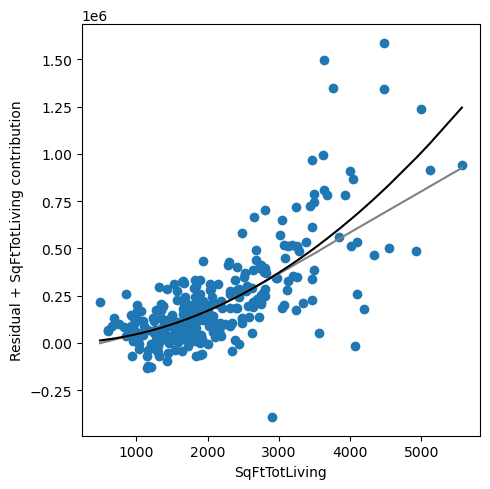

0.03879128168230191


In [27]:
def partialResidualPlot(model, df, outcome, feature, ax):
    # 모든 칼럼에 대한 model 추정치 
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        # 예측변수에 해당하지 않는 칼럼은 모두 0으로 만듦 
        copy_df[c] = 0.0
    # feature만 고려한 모델의 예측 결과
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0], # 왜 절편항을 빼지?
    })
    results = results.sort_values(by=['feature'])
    # 평활화
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    ax.scatter(results.feature, results.ypartial + results.residual)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

plt.tight_layout()
plt.show()
print(result_poly.params[2]) #이차항 계수 

##### done

In [28]:
# spline 회귀
formula = 'AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' + 'SqFtLot + Bathrooms + Bedrooms + BldgGrade'

In [29]:
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()